In [30]:
# 수치형 - 범주형 구조에 대한 데이터 분석

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.preprocessing import LabelEncoder


print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('seaborn version:', sns.__version__)
print(f"matplotlib: mpl {plt.matplotlib.__version__}")
print('sklearn version:', sklearn.__version__)
#
font_path = "c:/Windows/Fonts/malgun.ttf"
font_prop = mpl.font_manager.FontProperties(fname=font_path)
mpl.rcParams['font.family'] = font_prop.get_name()
mpl.rcParams['axes.unicode_minus'] = False

numpy version: 2.1.0
pandas version: 2.2.2
seaborn version: 0.13.2
matplotlib: mpl 3.9.2
sklearn version: 1.5.1


In [31]:
accident = pd.read_csv('accident.csv')

In [32]:
accident.drop(['사고번호', '시군구'], axis= 1)

,사고일시,요일,사고내용,사망자수,중상자수,경상자수,부상신고자수,사고유형,법규위반,노면상태,기상상태,도로형태,가해운전자 차종,가해운전자 성별,가해운전자 연령,가해운전자 상해정도,피해운전자 차종,피해운전자 성별,피해운전자 연령,피해운전자 상해정도
0,2014년 1월 1일 00시,수요일,부상신고사고,0,0,0,2,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,승용,남,65세,부상신고
1,2014년 1월 1일 01시,수요일,중상사고,0,1,3,0,차대차 - 기타,안전운전불이행,기타,맑음,단일로 - 기타,승용,남,32세,상해없음,승용,남,54세,중상
2,2014년 1월 1일 02시,수요일,중상사고,0,1,0,4,차대차 - 추돌 - 진행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,26세,상해없음,승용,여,26세,부상신고
3,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 기타,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,29세,상해없음,승용,남,25세,경상
4,2014년 1월 1일 02시,수요일,경상사고,0,0,2,0,차대차 - 측면직각충돌,기타,건조,맑음,교차로 - 교차로안,승용,여,42세,상해없음,승용,남,37세,경상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26265,2023년 12월 30일 05시,토요일,경상사고,0,0,1,0,차대사람 - 차도통행중,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,31세,상해없음,보행자,여,81세 이상,경상
26266,2023년 12월 30일 13시,토요일,경상사고,0,0,1,0,차대차 - 정면충돌,중앙선침범,젖음/습기,눈,교차로 - 교차로부근,승용,남,63세,상해없음,화물,남,60세,경상
26267,2023년 12월 30일 13시,토요일,경상사고,0,0,2,0,차대차 - 추돌,안전운전불이행,서리/결빙,눈,단일로 - 기타,승용,남,27세,상해없음,승용,남,59세,경상
26268,2023년 12월 31일 15시,일요일,경상사고,0,0,4,0,차대차 - 추돌,안전운전불이행,건조,맑음,단일로 - 기타,승용,남,48세,상해없음,승용,남,37세,경상


In [33]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 데이터프레임 생성 (예시 데이터)
df = accident[['사망자수', '중상자수', '경상자수', '부상신고자수', '가해운전자 성별']]

In [34]:
df.rename(columns={'가해운전자 성별': '가해운전자_성별'}, inplace=True)

C:\Users\medici\AppData\Local\Temp\ipykernel_21424\2690630641.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'가해운전자 성별': '가해운전자_성별'}, inplace=True)


In [35]:
df_dummies = pd.get_dummies(df, columns=['가해운전자_성별'], drop_first=True)

In [39]:
df_dummies

,사망자수,중상자수,경상자수,부상신고자수,가해운전자_성별_남,가해운전자_성별_여
0,0,0,0,2,True,False
1,0,1,3,0,True,False
2,0,1,0,4,True,False
3,0,0,2,0,True,False
4,0,0,2,0,False,True
...,...,...,...,...,...,...
26265,0,0,1,0,True,False
26266,0,0,1,0,True,False
26267,0,0,2,0,True,False
26268,0,0,4,0,True,False


In [41]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
# 범주형 변수를 더미 변수로 변환
df_dummies = pd.get_dummies(df, columns=['가해운전자_성별'], drop_first=False)

# 독립 변수와 종속 변수 정의
X = df_dummies[['중상자수', '경상자수', '부상신고자수', '사망자수']]
y = df_dummies['가해운전자_성별_여']

# 상수항 추가
X = sm.add_constant(X)

# 다중 회귀 모델 정의
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:             가해운전자_성별_여   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.065
Date:                Fri, 06 Sep 2024   Prob (F-statistic):            0.00269
Time:                        13:33:38   Log-Likelihood:                -6969.8
No. Observations:               26270   AIC:                         1.395e+04
Df Residuals:                   26265   BIC:                         1.399e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1148      0.003     33.131      0.0

In [42]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import logit

# 데이터프레임 생성 (예시 데이터)

# 범주형 변수를 이진 변수로 변환
df['가해운전자_성별'] = df['가해운전자_성별'].map({'남': 0, '여': 1})

# 독립 변수와 종속 변수 정의
X = df[['중상자수', '경상자수', '부상신고자수', '사망자수']]
y = df['가해운전자_성별']

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 정의
model = sm.Logit(y, X).fit()

# 결과 출력
print(model.summary())


Optimization terminated successfully.
         Current function value: 0.350684
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               가해운전자_성별   No. Observations:                26270
Model:                          Logit   Df Residuals:                    26265
Method:                           MLE   Df Model:                            4
Date:                Fri, 06 Sep 2024   Pseudo R-squ.:                0.001047
Time:                        13:36:13   Log-Likelihood:                -9212.5
converged:                       True   LL-Null:                       -9222.1
Covariance Type:            nonrobust   LLR p-value:                 0.0006847
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.0406      0.035    -58.151      0.000      -2.109      -1.972
중상자수          -0.0414      0.

C:\Users\medici\AppData\Local\Temp\ipykernel_21424\1202043427.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['가해운전자_성별'] = df['가해운전자_성별'].map({'남': 0, '여': 1})


C:\Users\medici\AppData\Local\Temp\ipykernel_21424\1949027412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis')


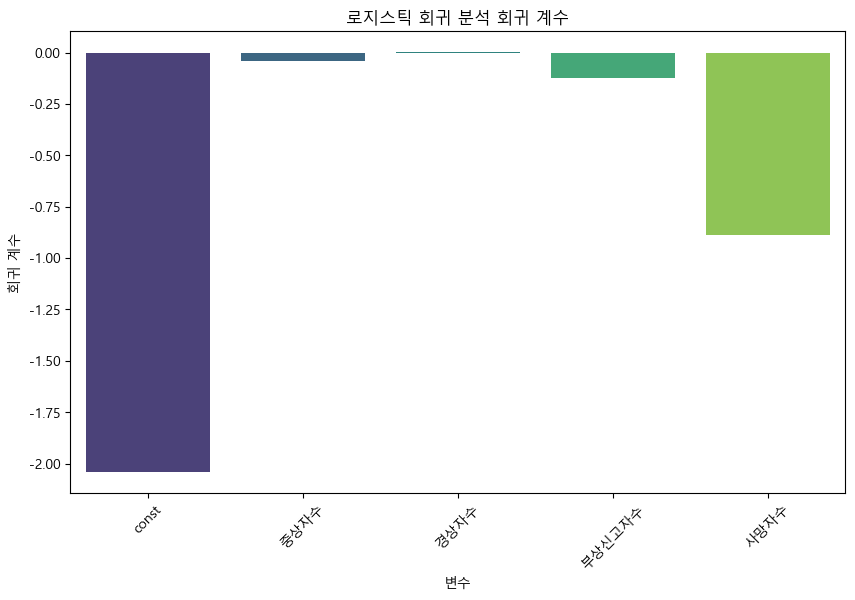

In [43]:
coefficients = model.params
conf = model.conf_int()
conf['Odds Ratio'] = coefficients
conf.columns = ['2.5%', '97.5%', 'Odds Ratio']

# 회귀 계수 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x=coefficients.index, y=coefficients.values, palette='viridis')
plt.xticks(rotation=45)
plt.xlabel('변수')
plt.ylabel('회귀 계수')
plt.title('로지스틱 회귀 분석 회귀 계수')
plt.show()

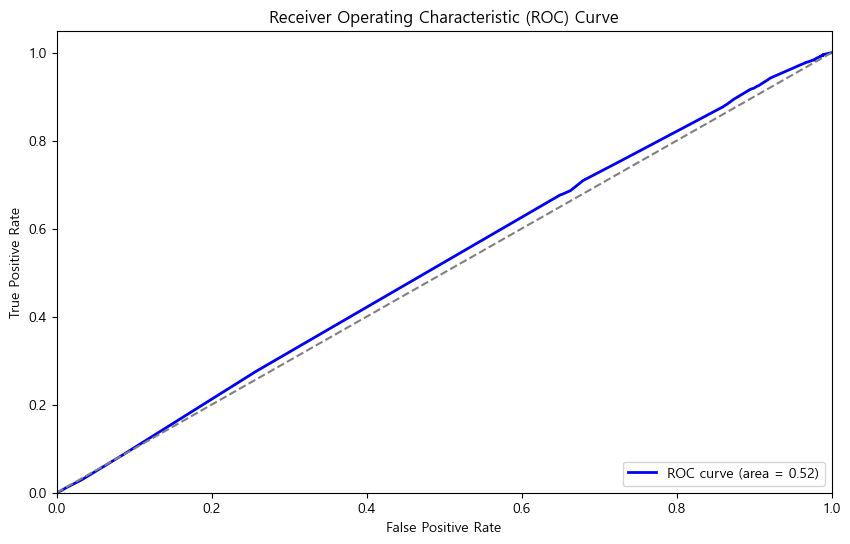

In [44]:
from sklearn.metrics import roc_curve, auc

# 예측 확률 계산
y_pred_prob = model.predict(X)

# ROC 커브와 AUC 계산
fpr, tpr, _ = roc_curve(y, y_pred_prob)
roc_auc = auc(fpr, tpr)

# ROC 곡선 시각화
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


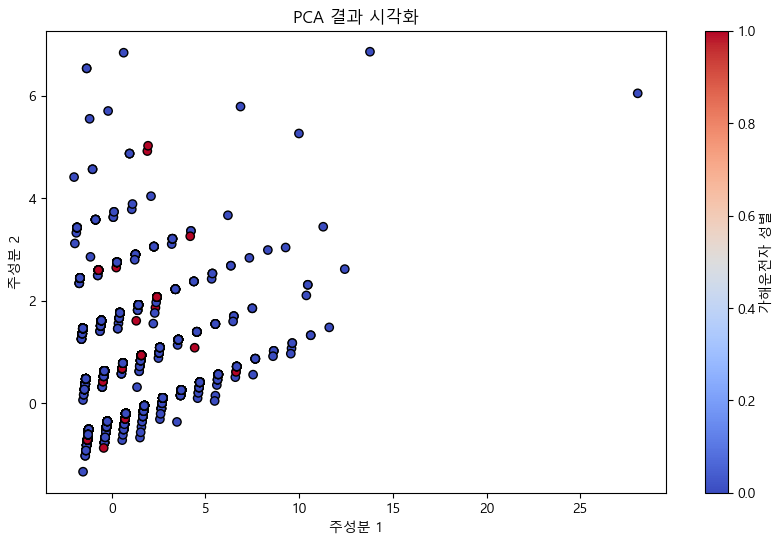

In [45]:
from sklearn.decomposition import PCA

# PCA 적용
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# PCA 결과 시각화
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolor='k')
plt.xlabel('주성분 1')
plt.ylabel('주성분 2')
plt.title('PCA 결과 시각화')
plt.colorbar(label='가해운전자 성별')
plt.show()


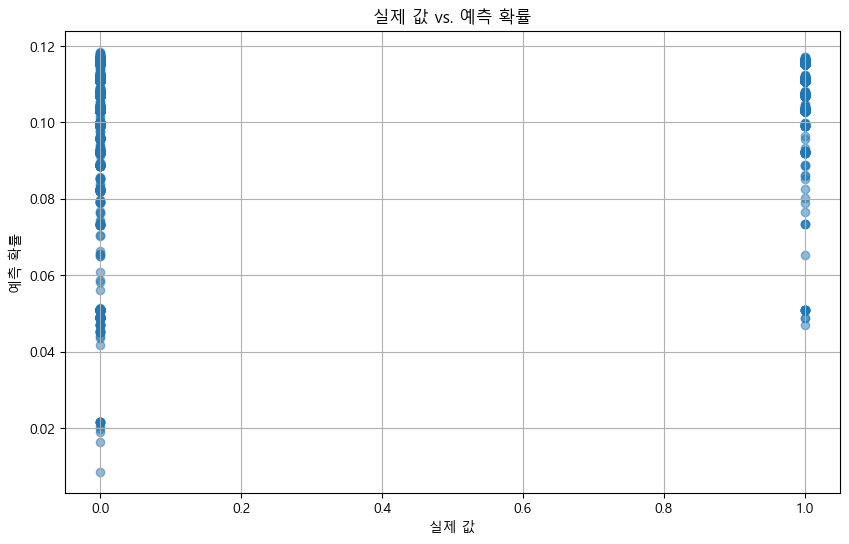

In [46]:
# 예측 결과와 실제 값을 비교
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred_prob, alpha=0.5)
plt.xlabel('실제 값')
plt.ylabel('예측 확률')
plt.title('실제 값 vs. 예측 확률')
plt.grid(True)
plt.show()
